<a href="https://colab.research.google.com/github/shaimayshah/fastaiwork/blob/master/BirdClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd

In [0]:
bs = 64

In [0]:
!wget http://www.vision.caltech.edu/visipedia-data/CUB-200-2011/CUB_200_2011.tgz && mkdir -p ~/data/birds

--2019-03-24 12:22:40--  http://www.vision.caltech.edu/visipedia-data/CUB-200-2011/CUB_200_2011.tgz
Resolving www.vision.caltech.edu (www.vision.caltech.edu)... 34.208.54.77
Connecting to www.vision.caltech.edu (www.vision.caltech.edu)|34.208.54.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1150585339 (1.1G) [application/x-tar]
Saving to: ‘CUB_200_2011.tgz’

CUB_200_2011.tgz    100%[===================>]   1.07G  5.26MB/s    in 5m 16s  

2019-03-24 12:27:57 (3.47 MB/s) - ‘CUB_200_2011.tgz’ saved [1150585339/1150585339]



In [0]:
!tar -xzf CUB_200_2011.tgz -C ~/data/birds/

In [0]:
!rm CUB_200_2011.tgz

In [0]:
!ls ~/data/birds

attributes.txt	CUB_200_2011


In [0]:
!ls ~data/birds/CUB_200_2011

ls: cannot access '~data/birds/CUB_200_2011': No such file or directory


In [0]:
!ls /root/data/birds/CUB_200_2011/images/

001.Black_footed_Albatross     101.White_Pelican
002.Laysan_Albatross	       102.Western_Wood_Pewee
003.Sooty_Albatross	       103.Sayornis
004.Groove_billed_Ani	       104.American_Pipit
005.Crested_Auklet	       105.Whip_poor_Will
006.Least_Auklet	       106.Horned_Puffin
007.Parakeet_Auklet	       107.Common_Raven
008.Rhinoceros_Auklet	       108.White_necked_Raven
009.Brewer_Blackbird	       109.American_Redstart
010.Red_winged_Blackbird       110.Geococcyx
011.Rusty_Blackbird	       111.Loggerhead_Shrike
012.Yellow_headed_Blackbird    112.Great_Grey_Shrike
013.Bobolink		       113.Baird_Sparrow
014.Indigo_Bunting	       114.Black_throated_Sparrow
015.Lazuli_Bunting	       115.Brewer_Sparrow
016.Painted_Bunting	       116.Chipping_Sparrow
017.Cardinal		       117.Clay_colored_Sparrow
018.Spotted_Catbird	       118.House_Sparrow
019.Gray_Catbird	       119.Field_Sparrow
020.Yellow_breasted_Chat       120.Fox_Sparrow
021.Eastern_Towhee	       121.Grasshopper_Sparrow
022.Chuck_will_Wi

In [0]:
path = '/root/data/birds/CUB_200_2011'

In [0]:
!ls {path}

attributes	    image_class_labels.txt  parts
bounding_boxes.txt  images		    README
classes.txt	    images.txt		    train_test_split.txt


In [0]:
data = ImageDataBunch.from_folder(f'{path}/images', valid_pct=0.2, size=224).normalize(imagenet_stats)

In [0]:
data.c

200

In [0]:
data.classes

['001.Black_footed_Albatross',
 '002.Laysan_Albatross',
 '003.Sooty_Albatross',
 '004.Groove_billed_Ani',
 '005.Crested_Auklet',
 '006.Least_Auklet',
 '007.Parakeet_Auklet',
 '008.Rhinoceros_Auklet',
 '009.Brewer_Blackbird',
 '010.Red_winged_Blackbird',
 '011.Rusty_Blackbird',
 '012.Yellow_headed_Blackbird',
 '013.Bobolink',
 '014.Indigo_Bunting',
 '015.Lazuli_Bunting',
 '016.Painted_Bunting',
 '017.Cardinal',
 '018.Spotted_Catbird',
 '019.Gray_Catbird',
 '020.Yellow_breasted_Chat',
 '021.Eastern_Towhee',
 '022.Chuck_will_Widow',
 '023.Brandt_Cormorant',
 '024.Red_faced_Cormorant',
 '025.Pelagic_Cormorant',
 '026.Bronzed_Cowbird',
 '027.Shiny_Cowbird',
 '028.Brown_Creeper',
 '029.American_Crow',
 '030.Fish_Crow',
 '031.Black_billed_Cuckoo',
 '032.Mangrove_Cuckoo',
 '033.Yellow_billed_Cuckoo',
 '034.Gray_crowned_Rosy_Finch',
 '035.Purple_Finch',
 '036.Northern_Flicker',
 '037.Acadian_Flycatcher',
 '038.Great_Crested_Flycatcher',
 '039.Least_Flycatcher',
 '040.Olive_sided_Flycatcher',
 '

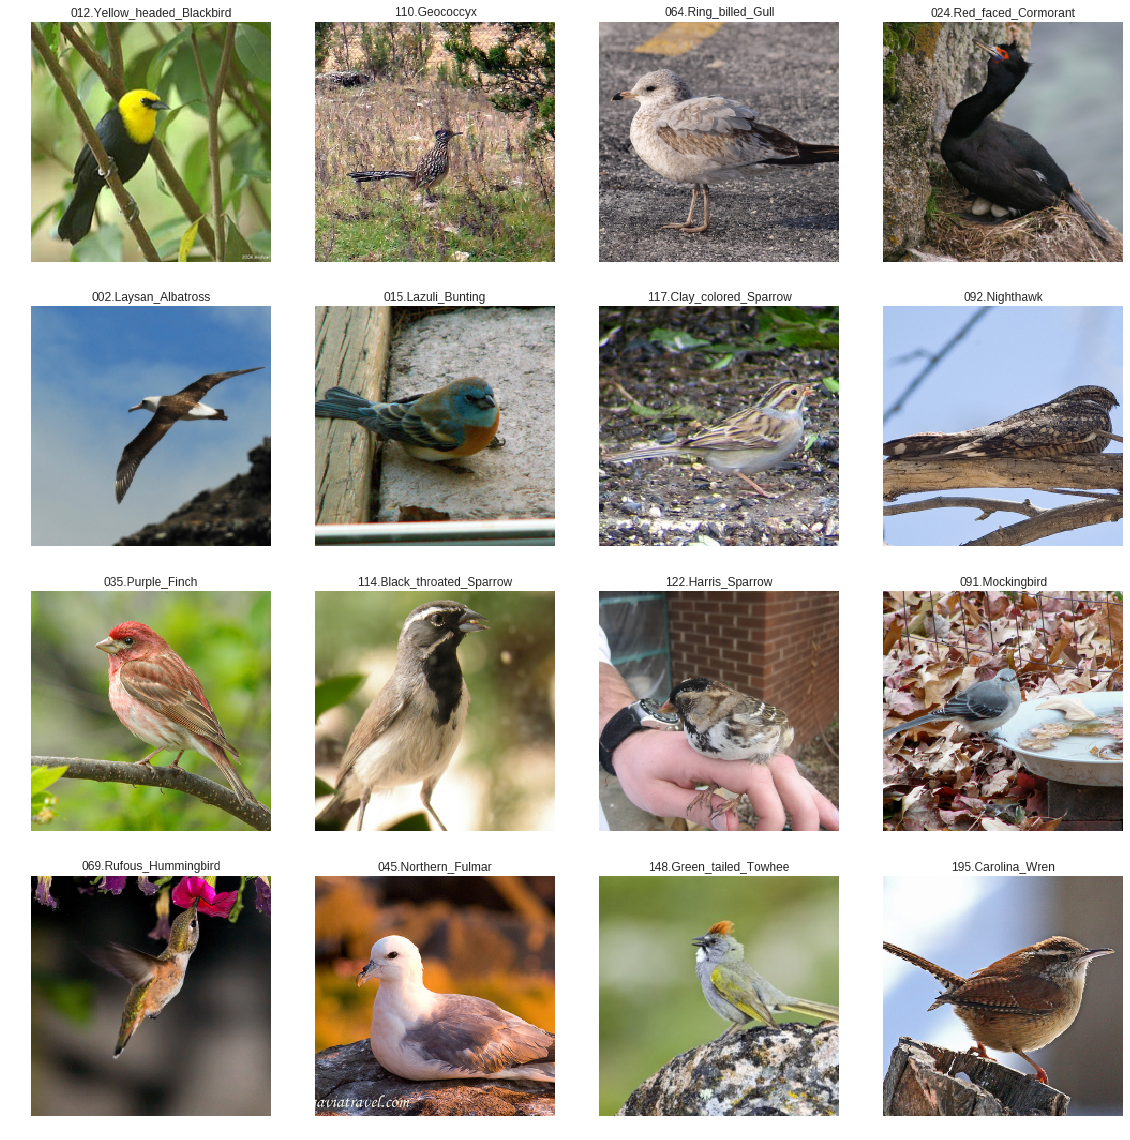

In [0]:
data.show_batch(rows=4)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.857723,2.292439,0.544336,02:12
1,1.893483,1.295101,0.350870,02:12
2,1.180738,1.102581,0.307594,02:09
3,0.826434,1.060603,0.286805,02:07


[('043.Yellow_bellied_Flycatcher', '037.Acadian_Flycatcher', 7),
 ('029.American_Crow', '030.Fish_Crow', 6),
 ('059.California_Gull', '066.Western_Gull', 6),
 ('112.Great_Grey_Shrike', '111.Loggerhead_Shrike', 5),
 ('144.Common_Tern', '143.Caspian_Tern', 5),
 ('066.Western_Gull', '060.Glaucous_winged_Gull', 4),
 ('068.Ruby_throated_Hummingbird', '067.Anna_Hummingbird', 4),
 ('071.Long_tailed_Jaeger', '072.Pomarine_Jaeger', 4),
 ('082.Ringed_Kingfisher', '079.Belted_Kingfisher', 4),
 ('120.Fox_Sparrow', '129.Song_Sparrow', 4),
 ('136.Barn_Swallow', '137.Cliff_Swallow', 4),
 ('137.Cliff_Swallow', '136.Barn_Swallow', 4),
 ('146.Forsters_Tern', '144.Common_Tern', 4),
 ('009.Brewer_Blackbird', '029.American_Crow', 3),
 ('029.American_Crow', '107.Common_Raven', 3),
 ('040.Olive_sided_Flycatcher', '102.Western_Wood_Pewee', 3),
 ('049.Boat_tailed_Grackle', '134.Cape_Glossy_Starling', 3),
 ('050.Eared_Grebe', '051.Horned_Grebe', 3),
 ('051.Horned_Grebe', '050.Eared_Grebe', 3),
 ('062.Herring_Gu

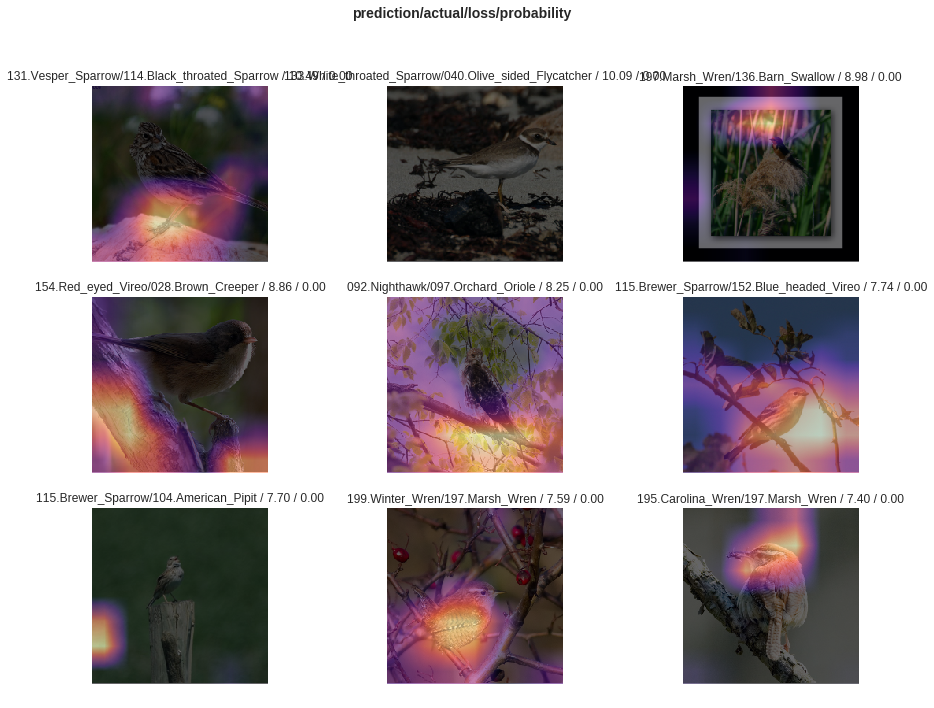

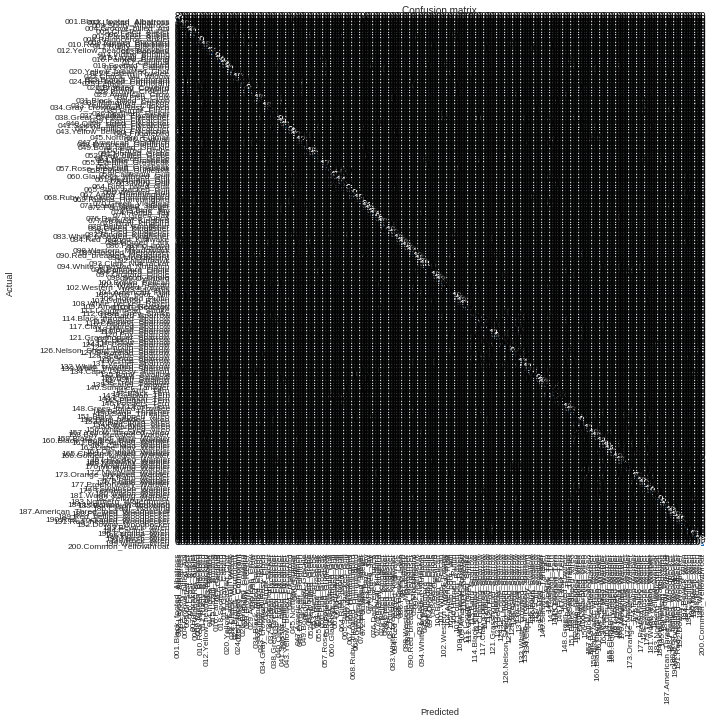

In [0]:
learn.save('stage-1')
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)
interp.most_confused(min_val=2)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


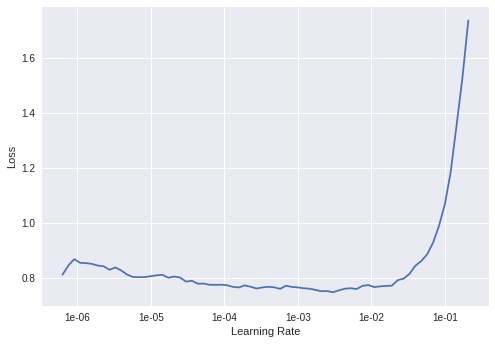

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-2, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,3.900588,4.087291,0.861689,02:20
1,2.432221,1.852500,0.494272,02:20


In [0]:
data1 = ImageDataBunch.from_folder(f'{path}/images', valid_pct=0.2, size=299, bs = bs//2).normalize(imagenet_stats)

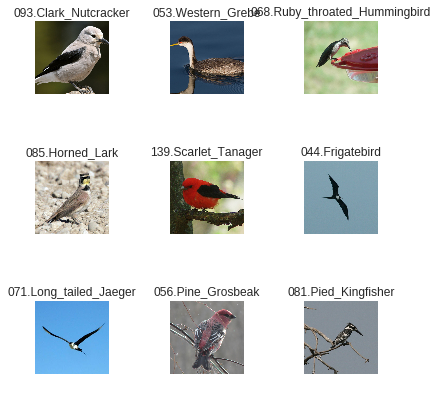

In [0]:
data1.show_batch(rows=3, figsize=(6,6))

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 51359734.58it/s]


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


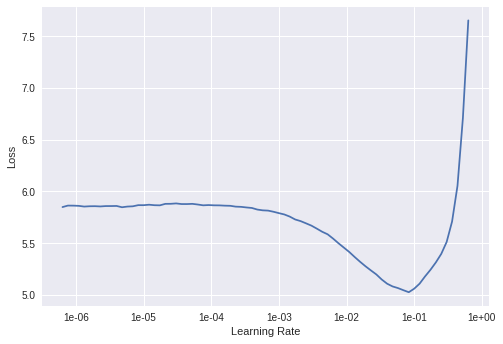

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.918224,2.549485,0.533729,02:56
1,2.000036,1.323353,0.359355,02:54
2,1.316794,1.140807,0.308443,02:54
3,0.896679,1.019570,0.288078,02:53
4,0.607270,0.948310,0.264319,02:53
5,0.389152,0.928592,0.254561,02:54
6,0.250785,0.905135,0.247773,02:54
7,0.193531,0.896558,0.248197,02:54


In [0]:
learn.fit_one_cycle(8, max_lr=slice(1e-01))

epoch,train_loss,valid_loss,error_rate,time
0,2.674163,2.275377,0.542215,02:54
1,6.184691,10.642864,0.857446,02:54
2,9.073263,7.259471,0.754349,02:54
3,6.604608,22.911678,0.665252,02:53
4,4.276364,12.319355,0.474756,02:52
5,2.342504,5.036569,0.357658,02:53
6,1.215289,2.760675,0.273653,02:54
7,0.780820,10.309814,0.260501,02:53


In [0]:
learn.fit_one_cycle(50, max_lr=slice(1e-01))

epoch,train_loss,valid_loss,error_rate,time
0,0.765376,4.793854,0.257955,02:52
1,0.762367,6.800086,0.263895,02:54
2,0.785379,7.656762,0.275350,02:53
3,1.005785,18.537006,0.325838,02:53
4,1.227872,3.955711,0.379720,02:53
5,1.751138,4.037525,0.361476,02:53
6,2.291107,10.331952,0.406449,02:54
7,3.256137,6.617227,0.446330,02:54
8,4.699902,22.589540,0.460331,02:54
9,5.400274,15.606826,0.526092,02:53
